In [26]:
import tensorflow as tf
import tensorflow.keras.datasets.imdb as imdb
import os
import numpy as np

In [27]:
# datasets
# https://ai.stanford.edu/~amaas/data/sentiment/

In [28]:
print(tf.__version__)

2.10.0


In [29]:
train_dir='datasets/aclImdb/train/'
test_dir='datasets/aclImdb/test/'
positive_train_dir='datasets/aclImdb/train/pos/'
negative_train_dir='datasets/aclImdb/train/neg/'
positive_test_dir='datasets/aclImdb/test/pos/'
negative_test_dir='datasets/aclImdb/test/neg/'

In [30]:
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

In [31]:
for sentence in os.listdir(positive_train_dir):
    with open(os.path.join(positive_train_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        training_sentences.append(sentence)
        training_labels.append(1)
len(training_sentences),len(training_labels)

(12500, 12500)

In [32]:
for sentence in os.listdir(negative_train_dir):
    with open(os.path.join(negative_train_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        training_sentences.append(sentence)
        training_labels.append(0)
len(training_sentences),len(training_labels)

(25000, 25000)

In [33]:
for sentence in os.listdir(positive_test_dir):
    with open(os.path.join(positive_test_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        testing_sentences.append(sentence)
        testing_labels.append(1)
len(testing_sentences),len(testing_labels)

(12500, 12500)

In [34]:
for sentence in os.listdir(negative_test_dir):
    with open(os.path.join(negative_test_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        testing_sentences.append(sentence)
        testing_labels.append(1)
len(testing_sentences),len(testing_labels)

(25000, 25000)

In [35]:
# training_sentences=[]
# training_labels=[]
# testing_sentences=[]
# testing_labels=[]

In [36]:
# training_data=tf.data.Dataset.from_tensor_slices((training_sentences,training_labels))

In [37]:
# for s,l in training_data:
#     training_sentences.append(s.numpy().decode('utf8'))
#     training_labels.append(l.numpy())

In [38]:
# len(training_labels)

In [39]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [40]:
# generate Padded Sequence
vocab_size=1000
max_length=120
embedding_dim=16
trunc_type='post'
oov_tok='<OOV>'

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)

In [43]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'he': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 'or': 40,
 'just': 41,
 'about': 42,
 "it's": 43,
 'out': 44,
 'has': 45,
 'if': 46,
 'some': 47,
 'there': 48,
 'what': 49,
 'good': 50,
 'more': 51,
 'when': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'she': 57,
 'even': 58,
 'my': 59,
 'would': 60,
 'which': 61,
 'only': 62,
 'story': 63,
 'really': 64,
 'see': 65,
 'their': 66,
 'had': 67,
 'can': 68,
 'were': 69,
 'me': 70,
 'well': 71,
 'than': 72,
 'we': 73,
 'much': 74,
 'been': 75,
 'bad': 76,
 'get': 77,
 'will': 78,
 'do': 79,
 'also': 80,
 'into': 81,
 'people': 82,
 '

# Building and compile the model

In [20]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 20)                38420     
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 54,441
Trainable params: 54,441
Non-trainable params: 0
_________________________________________________________________


# train the model

In [25]:
num_epochs=10

history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 6.6604 - val_accuracy: 0.4878
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0289 - accuracy: 0.9896 - val_loss: 6.7492 - val_accuracy: 0.5121
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 7.4181 - val_accuracy: 0.5048
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 7.3746 - val_accuracy: 0.5263
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0273 - accuracy: 0.9896 - val_loss: 8.4892 - val_accuracy: 0.4897
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 7.9483 - val_accuracy: 0.5305
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0182 - accuracy: 0.9934 - val_loss: 8.8577 - val_accuracy: 0.5094
Epoch 

# visualize word embeddings 

In [22]:
embedding_layer=model.layers[0]
embedding_Weights=embedding_layer.get_weights()[0]
embedding_Weights.shape
reverse_word_index=tokenizer.index_word
embedding_Weights.shape

(1000, 16)

In [23]:
import io

out_v=io.open('datasets/vecs.tsv','w',encoding='utf-8')
out_m=io.open('datasets/meta.tsv','w',encoding='utf-8')

for word_num in range(1, vocab_size):
    word_name= reverse_word_index[word_num]
    word_embedding=embedding_Weights[word_num]
    out_m.write(word_name+'\n')
    out_v.write('\t'.join([str(x) for x in word_embedding])+'\n')
out_v.close()
out_m.close()

<Figure size 640x480 with 0 Axes>

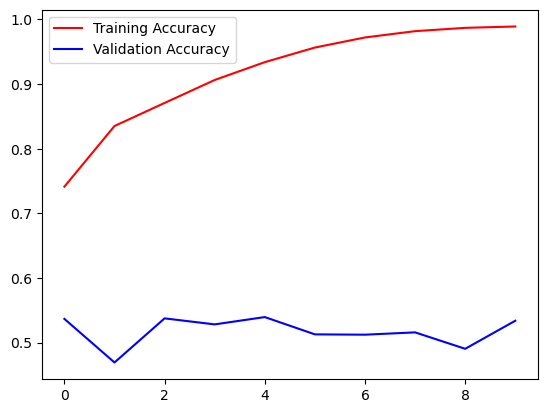

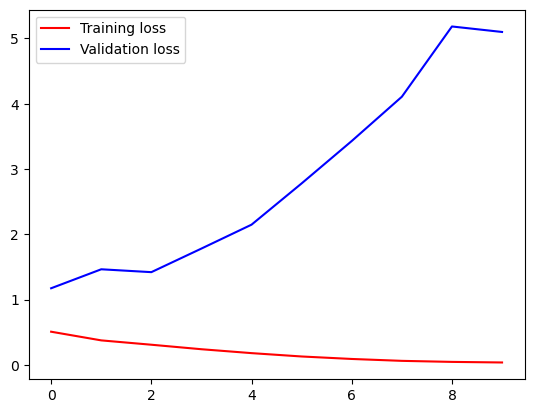

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r' , label='Training Accuracy')
plt.plot(epochs, val_acc, 'b' , label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r' , label='Training loss')
plt.plot(epochs, val_loss, 'b' , label='Validation loss')
plt.legend()
plt.figure()